<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Project_description_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project in the course Design of Experiemnts, Data Handling and Statistical Analysis for Material Scientists

matminer is a Python library for data mining the properties of materials.

Matminer contains routines for 40+ datasets (described [here](https://hackingmaterials.lbl.gov/matminer/dataset_summary.html))

The datasets available by loading the following modules:

- load_boltztrap_mp()
- load_brgoch_superhard_training()
- load_castelli_perovskites()
- load_citrine_thermal_conductivity()
- load_dielectric_constant()
- load_double_perovskites_gap()
- load_double_perovskites_gap_lumo()
- load_elastic_tensor()
- load_expt_formation_enthalpy()
- load_expt_gap()
- load_flla()
- load_glass_binary()
- load_glass_ternary_hipt()
- load_glass_ternary_landolt()
- load_heusler_magnetic()
- load_jarvis_dft_2d()
- load_jarvis_dft_3d()
- load_jarvis_ml_dft_training()
- load_m2ax()
- load_mp()
- load_phonon_dielectric_mp()
- load_piezoelectric_tensor()
- load_steel_strength()
- load_wolverton_oxides()



## Task:
1. Choose a suitable material property.
2. Investigate what features are important to describe it.
3. Build a model with as few variables as possible that describe the property you selected.
4. Predict/optimize the property at hand... here you must have an "imaginary" application for the property you have choosen. Try to figure out a case where you want a certain value for the proerty at hand.


In the report, I want to see how you set up the workflow (from data aqcuisition to sharing the results) for solving the problem. Try to write an introduction from a materials science point of view.





# Hints:

## Available datasets:

```
from matminer.datasets import get_available_datasets

get_available_datasets()
```

## Info about data set:


```
from matminer.datasets import get_all_dataset_info

print(get_all_dataset_info("expt_gap"))
```

## load the data set:

```
from matminer.datasets.convenience_loaders import load_elastic_tensor
df = load_elastic_tensor()  # loads dataset in a pandas DataFrame object

```
## Watch the data



```
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

profile.to_notebook_iframe()
```



## Watch columns:



```
df.head()
```

## Drop unwanted columns:


```
unwanted_columns = ["volume", "nsites", "compliance_tensor", "elastic_tensor",
                    "elastic_tensor_original", "K_Voigt", "G_Voigt", "K_Reuss", "G_Reuss"]
df = df.drop(unwanted_columns, axis=1)
```

## Filtering

```
mask = df["gap expt"] > 0
nonmetal_df = df[mask]
nonmetal_df
```


## Featurization

Matminer has its own featurizer described [here](https://hackingmaterials.lbl.gov/matminer/featurizer_summary.html). More features can be obtained using the [CBFV package](https://github.com/Kaaiian/CBFV).


Here is an example using the column formula in the dataset 'expt_gap' to find the composition:
```
from pymatgen.core import Composition
from matminer.featurizers.composition.element import ElementFraction

ef = ElementFraction()

ff=[]
for formel in df['formula']:
  ff.append(Composition(formel))

df['composition']=ff
            
df

```

which can thereafter be used with the CBFV package.

```
from CBFV.composition import generate_features
X_train, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

```
From here, we dive in to our multiregression/multivariate analysis tasks to build our model.


In [24]:
!pip install matminer
!pip install ydata-profiling
!pip install CBFV

In [2]:
from matminer.datasets import get_available_datasets

get_available_datasets()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'superconductivity2018',
 'tholander_nitrides',
 'ucsb_thermoe

In [4]:
from matminer.datasets import get_all_dataset_info

print(get_all_dataset_info("expt_gap"))

Dataset: expt_gap
Description: Experimental band gap of 6354 inorganic semiconductors.
Columns:
	formula: chemical formula
	gap expt: band gap (in eV) measured experimentally
Num Entries: 6354
Reference: https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.8b00124
Bibtex citations: ['@article{doi:10.1021/acs.jpclett.8b00124,\nauthor = {Zhuo, Ya and Mansouri Tehrani, Aria and Brgoch, Jakoah},\ntitle = {Predicting the Band Gaps of Inorganic Solids by Machine Learning},\njournal = {The Journal of Physical Chemistry Letters},\nvolume = {9},\nnumber = {7},\npages = {1668-1673},\nyear = {2018},\ndoi = {10.1021/acs.jpclett.8b00124},\nnote ={PMID: 29532658},\neprint = {\nhttps://doi.org/10.1021/acs.jpclett.8b00124\n\n}}']
File type: json.gz
Figshare URL: https://ndownloader.figshare.com/files/13464434
SHA256 Hash Digest: 2d0980e3533c1ba6ad6e392a88f08cfcf2d311d4b7fe6eb0b0c8e876211dfda3




In [35]:
from matminer.datasets import load_dataset

df = load_dataset("expt_gap")

In [36]:
df.head()

,formula,gap expt
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [37]:
df.columns

Index(['formula', 'gap expt'], dtype='object')

In [38]:
df.describe()

,gap expt
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [14]:
from ydata_profiling import ProfileReport

In [15]:
profile = ProfileReport(df, title="Profiling Report")

In [16]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Filtering data

In [13]:
mask = df["gap expt"] > 0
nonmetal_df = df[mask]
nonmetal_df

,formula,gap expt
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44
...,...,...
3891,ZnTe,2.25
3892,ZnTe,2.29
3893,ZnSe,2.76
3894,ZnSnP2,1.66


In [18]:
from pymatgen.core import Composition
from matminer.featurizers.composition.element import ElementFraction

ef = ElementFraction()

In [23]:
ff=[]
for formel in df['formula']:
  ff.append(Composition(formel))

df['composition']=ff

df

,formula,gap expt,composition
0,Hg0.7Cd0.3Te,0.35,"(Hg, Cd, Te)"
1,CuBr,3.08,"(Cu, Br)"
2,LuP,1.30,"(Lu, P)"
3,Cu3SbSe4,0.40,"(Cu, Sb, Se)"
4,ZnO,3.44,"(Zn, O)"
...,...,...,...
6349,Tm2MgTl,0.00,"(Tm, Mg, Tl)"
6350,Nb5Ga4,0.00,"(Nb, Ga)"
6351,Tb2Sb5,0.00,"(Tb, Sb)"
6352,Lu2AlTc,0.00,"(Lu, Al, Tc)"


In [25]:
pip install CBFV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 8.2 MB/s eta 0:00:00


In [28]:
from CBFV.composition import generate_features


In [39]:
rename_dict = {'gap expt': 'target'}
df = df.rename(columns=rename_dict)


In [40]:
df

,formula,target
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44
...,...,...
6349,Tm2MgTl,0.00
6350,Nb5Ga4,0.00
6351,Tb2Sb5,0.00
6352,Lu2AlTc,0.00


In [97]:
RNG_SEED=32
df_train = df.sample(n=4000, random_state=RNG_SEED)
df_test = df.sample(n=200, random_state=RNG_SEED)

In [122]:
X_train, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)



Processing Input Data: 100%|██████████| 4000/4000 [00:00<00:00, 18107.33it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4000/4000 [00:00<00:00, 4262.19it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 200/200 [00:00<00:00, 10752.70it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 200/200 [00:00<00:00, 7433.61it/s]


	Creating Pandas Objects...


In [123]:
X_train

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,39.0,82.94030,8.0,37.0,18.0,1.0,2.0,0.0,220.0,4.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
1,966.0,2154.13879,184.0,958.0,425.0,18.0,41.0,12.0,5233.0,63.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
2,845.0,1952.08888,100.0,247.0,104.0,23.0,0.0,0.0,1490.0,34.0,...,8.100,302.95,2676.15,5.90000,0.37,5.59000,258.7000,40.60000,286.0,2.81
3,652.0,1569.83086,68.0,184.0,72.0,3.0,8.0,3.0,1036.0,13.0,...,5.500,722.65,1262.95,6.24000,0.20,17.49000,52.5500,2.35000,197.0,2.19
4,74.0,167.32000,11.0,18.0,9.0,3.0,0.0,0.0,216.0,1.0,...,10.600,922.15,1363.15,1.74000,1.02,8.95400,127.4000,156.00000,148.0,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,224.0,546.95000,21.0,49.0,20.0,2.0,2.0,0.0,299.0,6.0,...,5.500,722.65,1262.95,6.24000,0.20,17.49000,52.5500,2.35000,197.0,2.19
3996,308.0,654.79340,62.0,216.0,117.0,10.0,11.0,0.0,1387.0,31.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
3997,218.0,506.92318,24.0,53.0,23.0,3.0,0.0,2.0,311.0,9.0,...,4.300,1090.15,890.15,5.73000,0.24,17.60000,34.7600,50.00000,302.0,2.96
3998,61.0,127.24125,13.0,57.0,27.0,2.0,3.0,0.0,381.0,5.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [110]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [111]:
X_train = normalize(X_train)
X_test = normalize(X_test)


In [87]:
import seaborn as sns
train_dataset = pd.DataFrame(X_train)
train_dataset.insert(0, "Egap", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7fbc68ee5ab0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 77250x77250 with 1601 Axes>

In [112]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)


LinearRegression()

In [103]:

y_train_pred = regr.predict(X_train)

Root mean squared error = 0.9286
R-squared = 0.6334


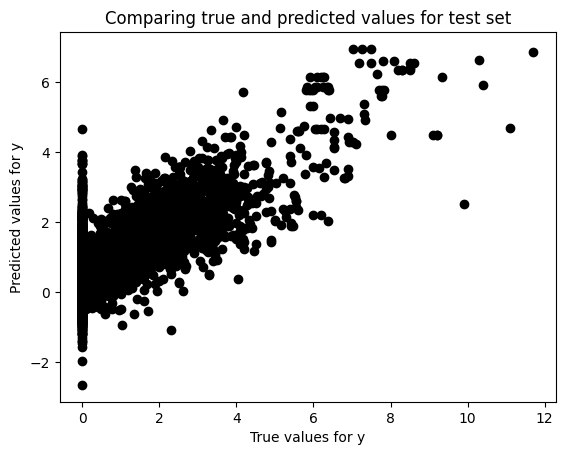

In [56]:
import matplotlib.pyplot as plt
import numpy as np
# Comparing true versus predicted values
plt.scatter(y_train, y_train_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R-squared = %.4f' % r2_score(y_train, y_train_pred))

In [118]:
ridge = linear_model.Ridge(alpha=0.8)
ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [58]:
y_train_pred = ridge.predict(X_train)

Root mean squared error = 1.0036
R-squared = 0.5718


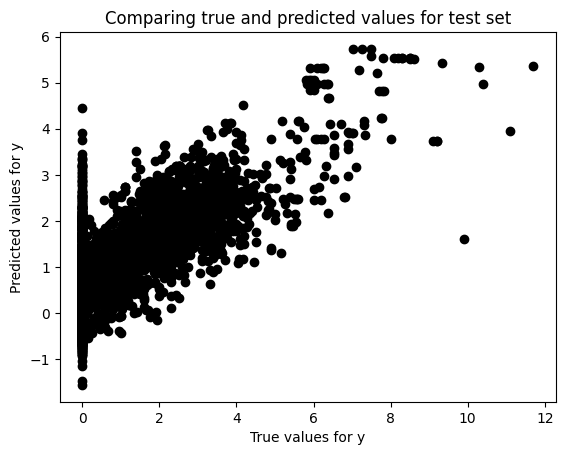

In [59]:
import matplotlib.pyplot as plt
import numpy as np
# Comparing true versus predicted values
plt.scatter(y_train, y_train_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R-squared = %.4f' % r2_score(y_train, y_train_pred))

In [79]:
import pandas as pd
coefficients=pd.DataFrame({'ridge':ridge.coef_, 'regr':regr.coef_})

SyntaxError: ignored

In [108]:
len(X_test)

4000

In [124]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, regr.predict(X_train))
y_pred = regr.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} eV",
    "MedAE on testing set": f"{mae_test:.2f} eV",
}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


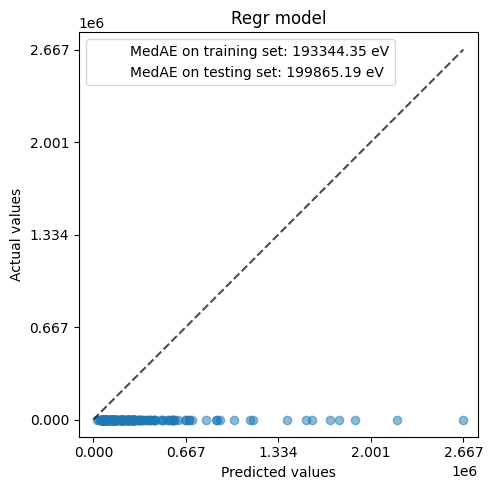

In [125]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Regr model")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [119]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, ridge.predict(X_train))
y_pred = ridge.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} eV",
    "MedAE on testing set": f"{mae_test:.2f} eV",
}

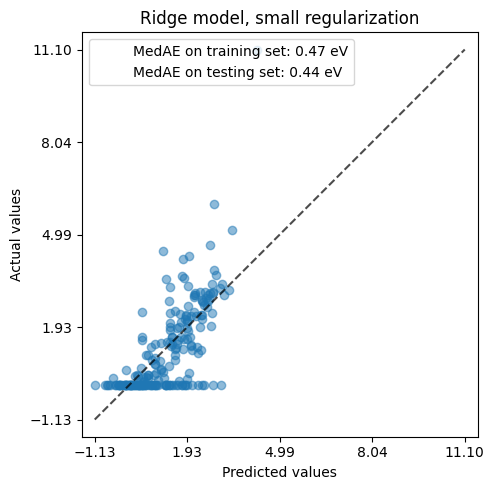

In [120]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

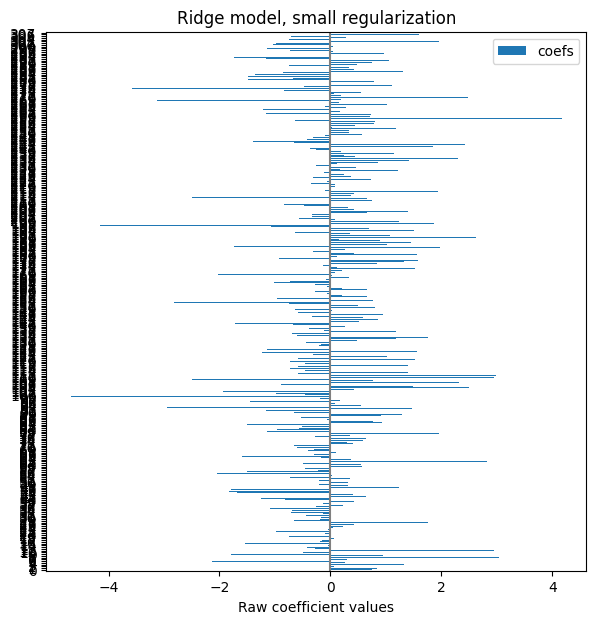

In [130]:
coefs=pd.DataFrame({'coefs':ridge.coef_})
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)